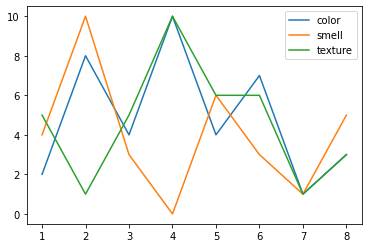

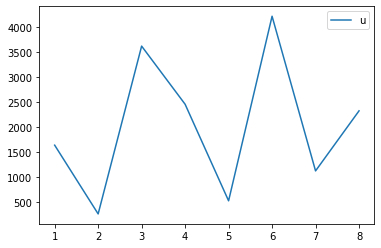

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Cheese

cheese = np.array([[1,2,3,4,5,6,7,8],[2,8,4,10,4,7,1,3],[4,10,3,0,6,3,1,5],[5,1,5,10,6,6,1,3],[1635,261,3615,2453,523,4212,1121,2321]])

for feature in cheese[1:4]:
    plt.plot(cheese[0], feature)
plt.legend(("color", "smell", "texture"))
plt.show()
plt.plot(cheese[0], cheese[4])
plt.legend("units sold")
plt.show()


SS_tot: 13918449.875
SS_reg: 4517229.503
SS_res: 9401220.372
MSE: 1175152.547
RMSE: 1084.045
MAE: 978.873
r²: 0.325
Your cheese will sell about 2271.07 units!
[list([array([3513.19773272])]) list([10, 0, 10])]


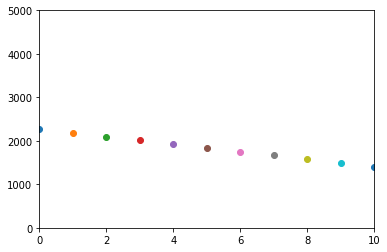

weights: offset = [2271.07383043] ,color = [62.3655756] ,smell = [-210.88063228] ,texture = [61.84681463]
weights: offset = [2271.07383043], color = [62.3655756], smell = [-210.88063228], texture = [61.84681463]
weights: offset = 2271.0738304327015, color = 62.365575602745764, smell = -210.88063228484742, texture = 61.84681462557887
weights: offset = 2271.07, color = 62.37, smell = -210.88, texture = 61.85


In [124]:
# multi linear regression
X = np.array([[2,8,4,10,4,7,1,3],[4,10,3,0,6,3,1,5],[5,1,5,10,6,6,1,3]]).transpose()
y = np.split(cheese[-1], cheese.shape[1])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
w = np.dot(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)
y_hat = np.dot(X, w)
pdiff = y - y_hat

""" We use different error measures to assess the quality of the model. """
ss_total = lambda y : np.sum( (y - np.mean(y)) ** 2.)
ss_reg = lambda y, y_hat : np.sum((y_hat - np.mean(y)) ** 2.)
ss_res = lambda diff : np.sum(diff**2.)
mse = lambda diff : np.mean(diff**2.)
rmse = lambda diff : np.sqrt(mse(diff))
mae = lambda diff : np.mean(np.abs(diff))
mrae = lambda diff : np.mean(np.abs(diff)/y)
print("SS_tot: %.3f" % ss_total(y))       # total sum of squares
print("SS_reg: %.3f" % ss_reg(y, y_hat))  # explained sum of squares
print("SS_res: %.3f" % ss_res(pdiff))     # residual sum of squares
print("MSE: %.3f" % mse(pdiff))  # mean squared error (variance of error), aka "average SS_res per data point"
print("RMSE: %.3f" % rmse(pdiff)) # standard deviation of error
print("MAE: %.3f" % mae(pdiff)) # off by +- 2.6 on average

print("r²: %.3f" % (1 -  ss_res(pdiff) / ss_total(y)))

def oracle(params, color, smelliness, texture):
    return np.dot(params.transpose(), [1, color, smelliness, texture])

predicted_sales = oracle(w, 0, 0, 0)
print("Your cheese will sell about %.2f units!" % predicted_sales)

maxSales = []
for i in range(11): # weil default 0 bis 11 (ausschließlich) = 0 bis 10
    for j in range(11):
        for k in range(11):
            maxSales.append([[oracle(w, i, j, k)], [i, j, k]])
            
maxSales = np.array(maxSales, dtype=object)
print(maxSales[np.argmax(maxSales[:,0])])

for i in range(11):
    plt.scatter(i, oracle(w, i, i, i))
plt.axis((0,10,0,5000))
plt.show()
print("weights: offset =", w[0], ",color =", w[1], ",smell =", w[2], ",texture =", w[3])
print(f"weights: offset = {w[0]}, color = {w[1]}, smell = {w[2]}, texture = {w[3]}")
print("weights: offset = {0}, color = {1}, smell = {2}, texture = {3}".format(w[0][0],w[1][0],w[2][0],w[3][0]))
print("weights: offset = %.2f, color = %.2f, smell = %.2f, texture = %.2f" % (w[0][0],w[1][0],w[2][0],w[3][0]))

In [174]:
"""
polynomial regression
a
yi = w0 + 
     w1x1 + w2x2 + w3x3 + 
     w4x1² + w5x1x2 + w6x2² + w7x2x3 + w8x3² + w9x3x1 +
     w10x1³ + w11x1²x2 + w12x1²x3 + w13x1x2x3 + w14x2³ + w15x2²x1 + w16x²x3 + w17x3³ + w18x3²x2 + w19x3²x1

b
w0 -> w19
= 20

c
w0 constant?
= 19

d
 y   =         X        *  w   +  e
[15]   [1, 2.5, 123...]   [w0]   [e1] 
[ 8]   [1, 2.3, 232...]   [w1]   [e2] 
[24] = [1, 2.8, 111...] * [w2] + [e3]
[ 1]   [1, 1.9, 265...]   [..]   [e4] 
[15]   [1, 3.1, 198...]   [w19]  [e5] 
"""
N = 5

c = [2.5, 2.3, 2.8, 1.9, 3.1] # x1
m = [123, 232, 111, 265, 198] # x2
a = [2, 5, 13, 4, 8] # x3
e = [15, 8, 24, 1, 15]

X = np.zeros((N, 19))

for i in range(N):
     X[i] = [c[i], m[i], a[i], c[i]**2, c[i]*m[i], c[i]*a[i], m[i]**2, m[i]*a[i], a[i]**2, c[i]**3, c[i]**2*m[i], c[i]**2*a[i], c[i]*m[i]**2, c[i]*m[i]*a[i], c[i]*a[i]**2, m[i]**3, m[i]**2*a[i], m[i]*a[i]**2, a[i]**3]

X = np.concatenate((np.ones((N, 1)), X), axis=1)

w = np.dot(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), e)
e_hat = np.dot(X, w)
pdiff = e - e_hat

def oracle(weights, c, m, a):
    return np.dot(weights.transpose(), [1, c, m, a, c**2, c*m, c*a, m**2, m*a, a**2, c**3, c**2*m, c**2*a, c*m**2, c*m*a, c*a**2, m**3, m**2*a, m*a**2, a**3])

print("escape rate: %.3f" % oracle(w, 2.5, 123, 2))
print("escape rate: %.3f" % oracle(w, 1.9, 265, 4))

catches = []
for c in np.arange(0, 10, 0.1):
     for m in np.arange(0, 1000, 10):
          for a in np.arange(0, 25, 1):
               cr = oracle(w,c,m,a)
               if cr > 0:
                    catches.append([cr,c,m,a])
print(catches[np.argmin(catches)])

escape rate: 9.318
escape rate: -39.776
[11.722022658213973, 0.0, 190, 0]
